C:\Users\user.DESKTOP-K1NFF6M\AppData\Local\Temp\ipykernel_12772\177645503.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'], errors='coerce')


Feature importances:
 Renovation              0.447351
Balcony                 0.233207
Address                 0.177134
Number_of_rooms         0.096766
Children_are_welcome    0.038223
Pets_allowed            0.003786
Furniture               0.003534
dtype: float64


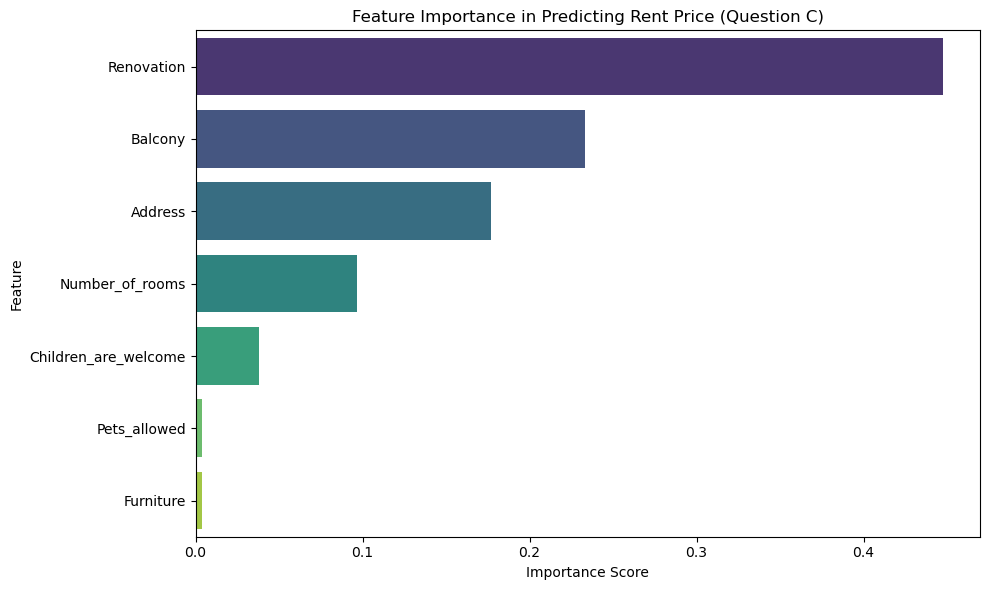

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('apartment_for_rent_train.csv')

df = df.drop_duplicates()
df_cleaned = df.dropna()

df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'], errors='coerce')
Q1 = df_cleaned['Price'].quantile(0.25)
Q3 = df_cleaned['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df_cleaned[(df_cleaned['Price'] >= lower_bound) & (df_cleaned['Price'] <= upper_bound)]

df_cleaned['Address'] = df_cleaned['Address'].astype('category').cat.codes
categorical_cols = ['Balcony', 'Furniture', 'Renovation', 'Children_are_welcome', 'Pets_allowed']
for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].astype('category').cat.codes

features = ['Address', 'Number_of_rooms', 'Renovation', 'Balcony', 'Furniture', 'Children_are_welcome', 'Pets_allowed']
X = df_cleaned[features]
y = df_cleaned['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

importances = pd.Series(tree.feature_importances_, index=features).sort_values(ascending=False)
print("Feature importances:\n", importances)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index, palette="viridis")
plt.title("Feature Importance in Predicting Rent Price (Question C)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("feature_importance_qc.png")
plt.show()
